## Classifying the income in US household data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
%matplotlib inline

In [2]:
adults = pd.read_csv('USHouseHold.csv', header = None)

In [3]:
adults.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adults.columns = ['age','workclass','fnlwgt','education','education-num','marital_Status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','Income'] 


In [5]:
adults.head()

,age,workclass,fnlwgt,education,education-num,marital_Status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


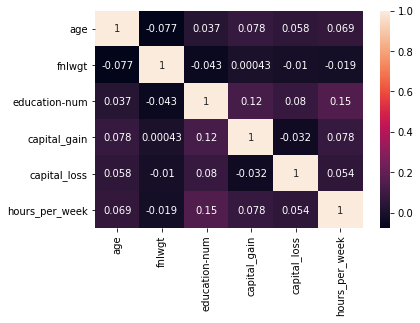

In [6]:
sns.heatmap(adults.corr() , annot=True)

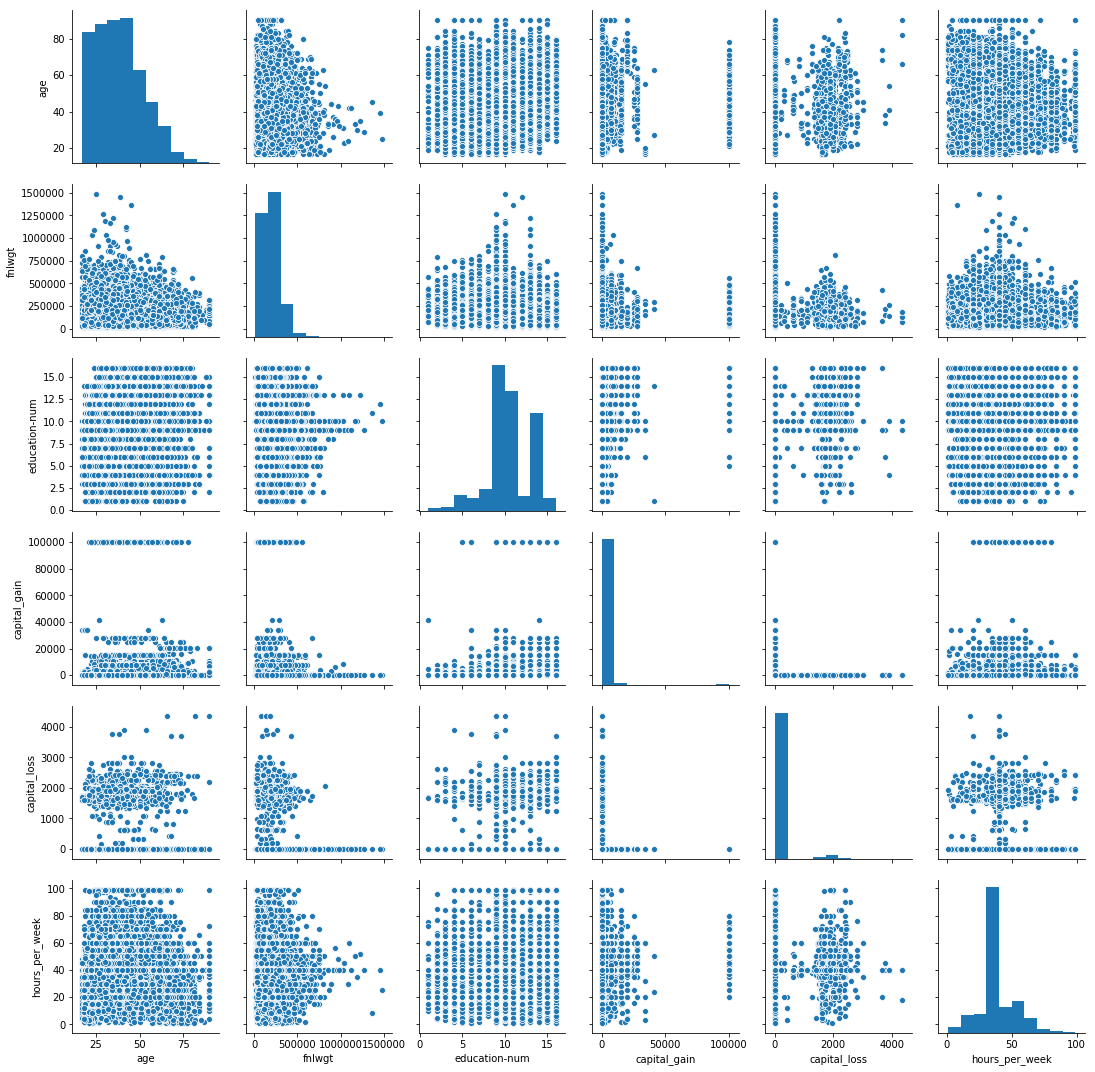

In [7]:
sns.pairplot(adults)

In [8]:
adults['Income'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

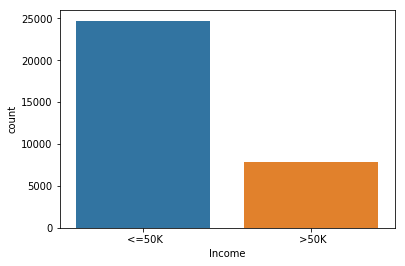

In [9]:
sns.countplot(adults['Income'])
# the data is imbalanced

In [10]:
# Many categorical variables and hence LabelEncoding the target variable 
# and OneHotEncoding the independent variables needed
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
le = LabelEncoder().fit(adults['Income'])

In [12]:
le.classes_

array([' <=50K', ' >50K'], dtype=object)

In [13]:
adults['Income'] = le.transform(adults['Income'])

In [14]:
adults['Income'].head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

In [15]:
adults['Income'].value_counts()

0    24720
1     7841
Name: Income, dtype: int64

In [16]:
adults.head()

,age,workclass,fnlwgt,education,education-num,marital_Status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

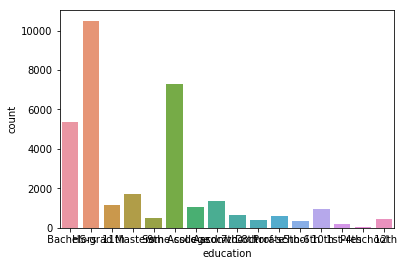

In [17]:
sns.countplot(adults['education'])
plt.tight_layout

In [18]:
adults['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

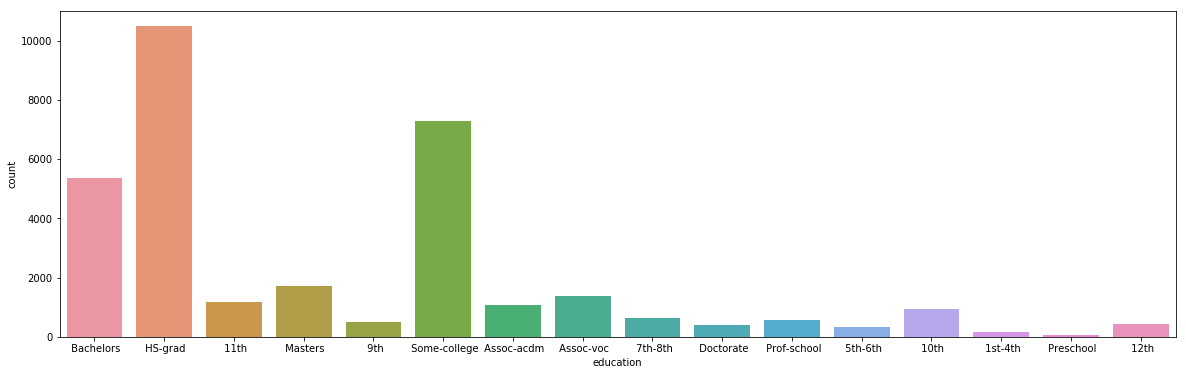

In [19]:
plt.figure(figsize =(20,6))
sns.countplot(adults['education'])

In [20]:
pd.get_dummies(adults['education'], drop_first= True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 11th            32561 non-null uint8
 12th            32561 non-null uint8
 1st-4th         32561 non-null uint8
 5th-6th         32561 non-null uint8
 7th-8th         32561 non-null uint8
 9th             32561 non-null uint8
 Assoc-acdm      32561 non-null uint8
 Assoc-voc       32561 non-null uint8
 Bachelors       32561 non-null uint8
 Doctorate       32561 non-null uint8
 HS-grad         32561 non-null uint8
 Masters         32561 non-null uint8
 Preschool       32561 non-null uint8
 Prof-school     32561 non-null uint8
 Some-college    32561 non-null uint8
dtypes: uint8(15)
memory usage: 477.0 KB


In [21]:
adults['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [22]:
adults[adults['workclass'] == ' ?']
# workclass has this value ' ?' which needs to be taken care

,age,workclass,fnlwgt,education,education-num,marital_Status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,0
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0
128,35,?,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,0
149,43,?,174662,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,0
154,52,?,252903,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,45,United-States,1
160,68,?,38317,1st-4th,2,Divorced,?,Not-in-family,White,Female,0,0,20,United-States,0
187,53,?,135105,Bachelors,13,Divorced,?,Not-in-family,White,Female,0,0,50,United-States,0


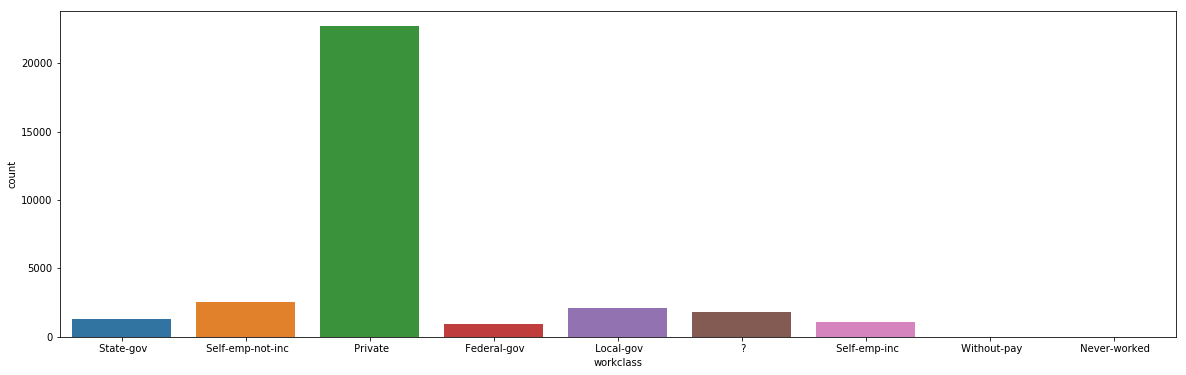

In [23]:
plt.figure(figsize =(20,6))
sns.countplot(adults['workclass'] )

In [24]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital_Status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
Income            32561 non-null int32
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [25]:
adults[adults['workclass'] == ' ?'].count()

age               1836
workclass         1836
fnlwgt            1836
education         1836
education-num     1836
marital_Status    1836
occupation        1836
relationship      1836
race              1836
sex               1836
capital_gain      1836
capital_loss      1836
hours_per_week    1836
native_country    1836
Income            1836
dtype: int64

In [26]:
adults['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [27]:
adults['workclass'].value_counts().count()

9

In [28]:
adults['workclass'].value_counts().sum()

32561

In [29]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital_Status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
Income            32561 non-null int32
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [30]:
adults.describe()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week,Income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [31]:
adults['workclass']

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
5                  Private
6                  Private
7         Self-emp-not-inc
8                  Private
9                  Private
10                 Private
11               State-gov
12                 Private
13                 Private
14                 Private
15                 Private
16        Self-emp-not-inc
17                 Private
18                 Private
19        Self-emp-not-inc
20                 Private
21                 Private
22             Federal-gov
23                 Private
24                 Private
25               Local-gov
26                 Private
27                       ?
28                 Private
29                 Private
               ...        
32531                    ?
32532              Private
32533              Private
32534              Private
32535              Private
32536              Private
3

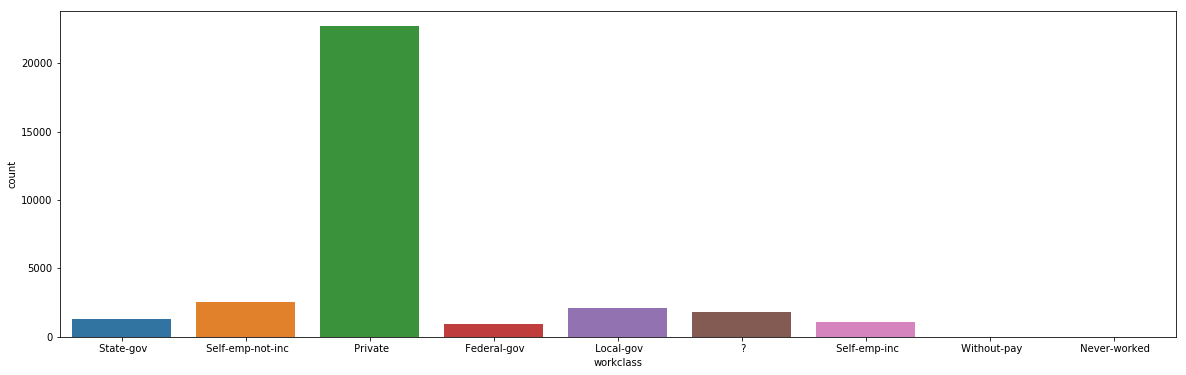

In [32]:
plt.figure(figsize =(20,6))
sns.countplot(adults['workclass'] )

In [33]:
adults[adults['workclass'] == ' ?'].count()

age               1836
workclass         1836
fnlwgt            1836
education         1836
education-num     1836
marital_Status    1836
occupation        1836
relationship      1836
race              1836
sex               1836
capital_gain      1836
capital_loss      1836
hours_per_week    1836
native_country    1836
Income            1836
dtype: int64

In [34]:
#  Dropping the workclass with ? value
adults = adults[adults['workclass'] != ' ?']

In [35]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 0 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
workclass         30725 non-null object
fnlwgt            30725 non-null int64
education         30725 non-null object
education-num     30725 non-null int64
marital_Status    30725 non-null object
occupation        30725 non-null object
relationship      30725 non-null object
race              30725 non-null object
sex               30725 non-null object
capital_gain      30725 non-null int64
capital_loss      30725 non-null int64
hours_per_week    30725 non-null int64
native_country    30725 non-null object
Income            30725 non-null int32
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


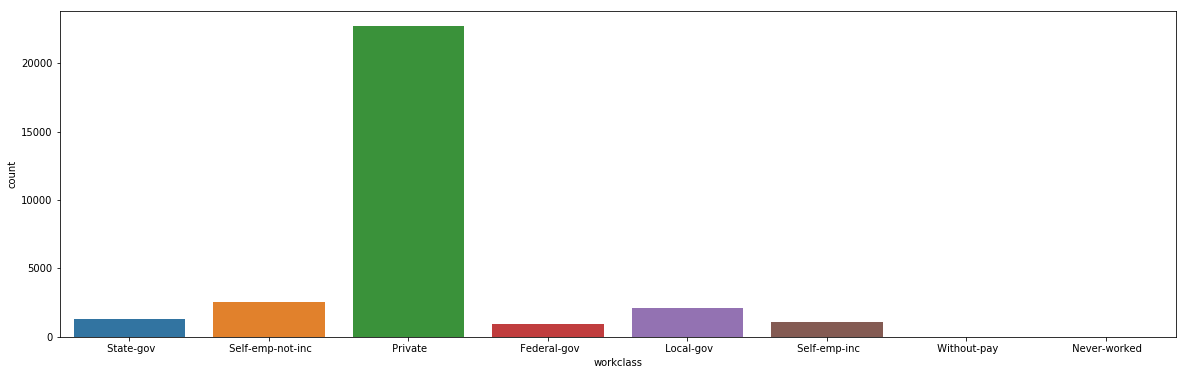

In [36]:
# Chekcing whether the workclass values are clear now
plt.figure(figsize =(20,6))
sns.countplot(adults['workclass'] )

In [37]:
oneHotWorkClass = pd.get_dummies(adults['workclass'], drop_first= True)

In [38]:
oneHotWorkClass.head()

,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [39]:
adults['education'].count()

30725

In [40]:
adults['education'].value_counts()

 HS-grad         9969
 Some-college    6777
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1057
 Assoc-acdm      1020
 10th             833
 7th-8th          574
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: education, dtype: int64

In [41]:
oneHotEducation = pd.get_dummies(adults['education'] , drop_first= True)

In [42]:
oneHotEducation.head()

,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
adults['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
 ?                       7
Name: occupation, dtype: int64

In [44]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 0 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
workclass         30725 non-null object
fnlwgt            30725 non-null int64
education         30725 non-null object
education-num     30725 non-null int64
marital_Status    30725 non-null object
occupation        30725 non-null object
relationship      30725 non-null object
race              30725 non-null object
sex               30725 non-null object
capital_gain      30725 non-null int64
capital_loss      30725 non-null int64
hours_per_week    30725 non-null int64
native_country    30725 non-null object
Income            30725 non-null int32
dtypes: int32(1), int64(6), object(8)
memory usage: 4.9+ MB


In [45]:
# Dropping the rows with this ' ?' value
adults = adults[adults['occupation'] != ' ?']

In [46]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 0 to 32560
Data columns (total 15 columns):
age               30718 non-null int64
workclass         30718 non-null object
fnlwgt            30718 non-null int64
education         30718 non-null object
education-num     30718 non-null int64
marital_Status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital_gain      30718 non-null int64
capital_loss      30718 non-null int64
hours_per_week    30718 non-null int64
native_country    30718 non-null object
Income            30718 non-null int32
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [47]:
oneHotOccupation = pd.get_dummies(adults['occupation'], drop_first=True)

In [48]:
oneHotOccupation

,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,0


In [49]:
adults['marital_Status'].value_counts()

 Married-civ-spouse       14339
 Never-married             9912
 Divorced                  4258
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: marital_Status, dtype: int64

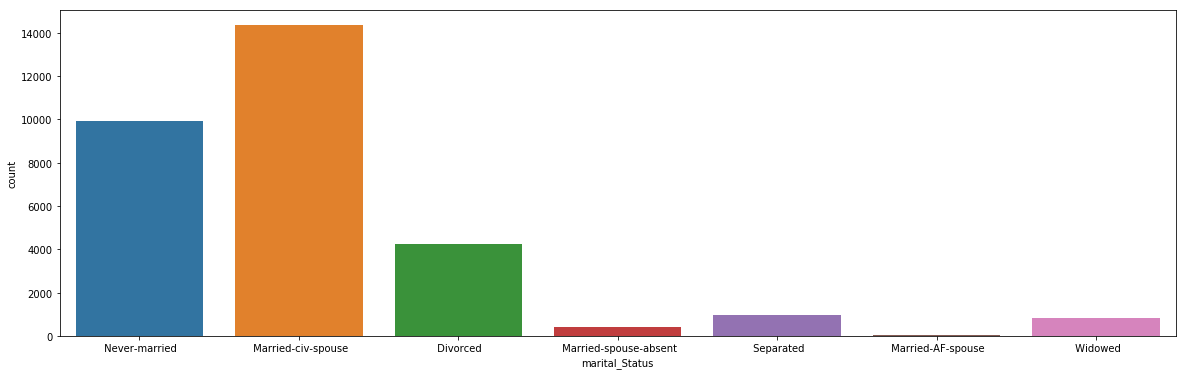

In [50]:
plt.figure(figsize = (20,6))
sns.countplot(adults['marital_Status'])

In [51]:
oneHotMarital = pd.get_dummies(adults['marital_Status'] , drop_first= True)

In [52]:
oneHotMarital

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,0,1,0,0,0
7,0,1,0,0,0,0
8,0,0,0,1,0,0
9,0,1,0,0,0,0


In [53]:
adults['relationship'].value_counts()

 Husband           12704
 Not-in-family      7865
 Own-child          4525
 Unmarried          3271
 Wife               1435
 Other-relative      918
Name: relationship, dtype: int64

In [54]:
adults[ adults['relationship'] == ' Husband'].head()

,age,workclass,fnlwgt,education,education-num,marital_Status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


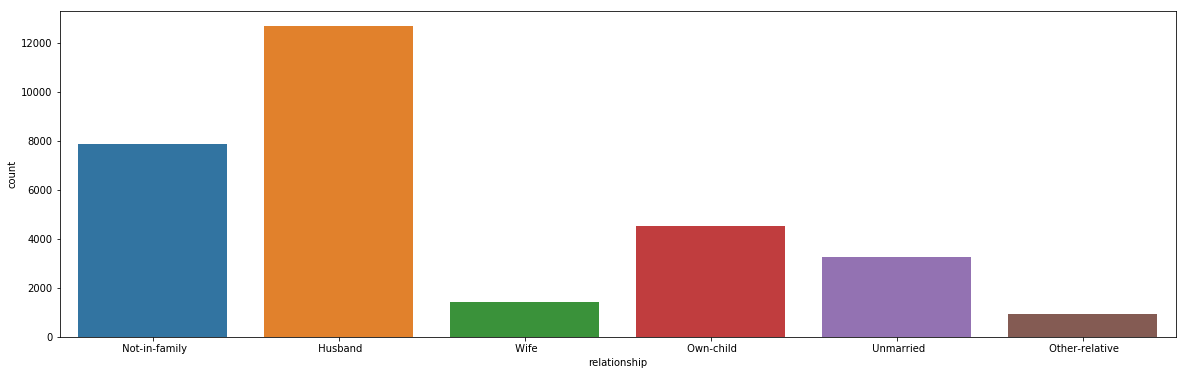

In [55]:
plt.figure(figsize = (20,6))
sns.countplot( adults['relationship'])

In [56]:
oneHotRelationship = pd.get_dummies( adults['relationship'] , drop_first= True)

In [57]:
oneHotRelationship.head()

,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [58]:
adults['native_country'].value_counts()

 United-States                 27504
 Mexico                          610
 ?                               556
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Haiti                            42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

In [59]:
adults['native_country'].count()

30718

In [60]:
adults['native_country'].value_counts().count()

42

In [61]:
oneHotNative = pd.get_dummies(adults['native_country'], drop_first= True)

In [62]:
oneHotNative.head()

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
adults['race'].value_counts()

 White                 26301
 Black                  2909
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
Name: race, dtype: int64

In [64]:
oneHotRace = pd.get_dummies(adults['race'])

In [65]:
oneHotRace.head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [66]:
adults['sex'].value_counts()

 Male      20788
 Female     9930
Name: sex, dtype: int64

In [67]:
oneHotAdults = pd.get_dummies(adults['sex'], drop_first= True)

In [68]:
oneHotAdults.head()

,Male
0,1
1,1
2,1
3,1
4,0


In [69]:
# Remove the categorical features which were onehot coded
adults.drop(['workclass','education','marital_Status','occupation','relationship',
           'race','sex','native_country'],axis=1,inplace=True) 

In [70]:
adults.head()

,age,fnlwgt,education-num,capital_gain,capital_loss,hours_per_week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [71]:
# concat all the one hot encoded cols to the main df
adults = pd.concat([adults, oneHotWorkClass, oneHotEducation,
               oneHotOccupation, oneHotMarital, oneHotRelationship, oneHotNative, oneHotAdults], axis = 1)

In [72]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 0 to 32560
Data columns (total 95 columns):
age                            30718 non-null float64
fnlwgt                         30718 non-null float64
education-num                  30718 non-null float64
capital_gain                   30718 non-null float64
capital_loss                   30718 non-null float64
hours_per_week                 30718 non-null float64
Income                         30718 non-null float64
 Local-gov                     30725 non-null uint8
 Never-worked                  30725 non-null uint8
 Private                       30725 non-null uint8
 Self-emp-inc                  30725 non-null uint8
 Self-emp-not-inc              30725 non-null uint8
 State-gov                     30725 non-null uint8
 Without-pay                   30725 non-null uint8
 11th                          30725 non-null uint8
 12th                          30725 non-null uint8
 1st-4th                       30725 non-null

In [73]:
#remove the duplicates
_ , i = np.unique(adults.columns, return_index= True)

In [74]:
i

array([14, 15, 16, 17, 18, 19, 29, 20, 21, 22, 53, 54, 55, 56, 30, 57, 23,
       58, 59, 60, 61, 31, 32, 62, 63, 64, 65, 24, 66, 33, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77,  7, 34, 94, 42, 43, 44, 25, 78, 45,  8,
       79, 48, 49, 35, 80, 50, 81, 82, 83, 84, 26, 36,  9, 27, 37, 38, 85,
       39, 86, 10, 11, 46, 28, 87, 12, 88, 40, 89, 41, 90, 91, 51, 92, 47,
       52, 13, 93,  6,  0,  3,  4,  2,  1,  5], dtype=int64)

In [75]:
adults = adults.iloc[:,i]

In [76]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 0 to 32560
Data columns (total 95 columns):
 11th                          30725 non-null uint8
 12th                          30725 non-null uint8
 1st-4th                       30725 non-null uint8
 5th-6th                       30725 non-null uint8
 7th-8th                       30725 non-null uint8
 9th                           30725 non-null uint8
 Armed-Forces                  30718 non-null float64
 Assoc-acdm                    30725 non-null uint8
 Assoc-voc                     30725 non-null uint8
 Bachelors                     30725 non-null uint8
 Cambodia                      30718 non-null float64
 Canada                        30718 non-null float64
 China                         30718 non-null float64
 Columbia                      30718 non-null float64
 Craft-repair                  30718 non-null float64
 Cuba                          30718 non-null float64
 Doctorate                     30725 non-null

In [77]:
x = adults.drop('Income' , axis = 1)
y = adults['Income']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.1)

In [80]:
train_data = lgb.Dataset(x_train, label = y_train)
test_data = lgb.Dataset(x_test, label = y_test)

In [81]:
# set the dictionary of parameters for Light GBM

parameters = {
    'objective' : 'binary',
    'num_leaves' : 100,
    'max_depth' : 7, 
    'learning_rate' : 0.05,
    'metric' : 'auc',
    'max_bin':200
}

In [82]:
model = lgb.train(parameters, train_data , num_boost_round= 500)

In [83]:
from sklearn.metrics import classification_report , confusion_matrix

In [84]:
pred = model.predict(x_test)
pred
print('len(pred) -', len(pred))
print('len(y_test) -', len(y_test))
print('pred[10]')
print(pred[10])


pred_df = pd.DataFrame(pred,columns =['prediction'])
print('pred_df.shape - ',pred_df.shape)



len(pred) - 3073
len(y_test) - 3073
pred[10]
0.00684269306649287
pred_df.shape -  (3073, 1)


In [85]:


print('y_test shape')
print(y_test.shape)

print('y_test')
print(y_test)

print('pred')
print(pred)

print('pred_df')
print(pred_df)

# y_test.reset_index(inplace = True)
print('y_test')
print(y_test)

y_test shape
(3073,)
y_test
19948    0.0
29605    0.0
8309     0.0
17830    0.0
23912    0.0
21640    0.0
26506    0.0
14469    0.0
31133    0.0
13218    0.0
27793    0.0
5636     0.0
25264    0.0
20244    0.0
16911    0.0
22475    1.0
8213     1.0
26761    0.0
29761    0.0
28114    0.0
16507    0.0
27983    0.0
27299    0.0
8873     0.0
18847    1.0
16734    0.0
3140     1.0
3147     0.0
14479    0.0
2891     0.0
        ... 
9057     0.0
4445     1.0
16159    0.0
7594     0.0
11618    0.0
18801    0.0
15681    0.0
30522    1.0
5058     1.0
13621    0.0
7806     1.0
5665     0.0
29138    1.0
26568    0.0
6354     0.0
9463     0.0
27023    1.0
22783    0.0
30185    0.0
1277     1.0
8074     1.0
9961     0.0
26229    0.0
11300    0.0
9502     1.0
18097    0.0
9994     0.0
22371    0.0
1494     0.0
219      0.0
Name: Income, Length: 3073, dtype: float64
pred
[0.03201477 0.7321042  0.09841123 ... 0.17769908 0.00182138 0.00549981]
pred_df
      prediction
0       0.032015
1       0.732104


In [86]:
#Converting probabilities into 1 or 0 , setting the threshold to .5 
for i in range(len(pred)): 
    if pred[i]>=.5:
        pred[i]=1 
    else: 
        pred[i]=0  

In [87]:
print( classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      2343
         1.0       0.78      0.68      0.72       730

   micro avg       0.88      0.88      0.88      3073
   macro avg       0.84      0.81      0.82      3073
weighted avg       0.87      0.88      0.87      3073



In [93]:
print( confusion_matrix(y_test,pred))

[[2138  205]
 [ 188  542]]
